In [340]:
import pandas as pd
df = pd.read_csv("cities_by_day.csv",parse_dates=["Date"])

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  C6H6        23908 non-null  float64       
 12  C7H8        21490 non-null  float64       
 13  C8H10       11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [342]:
initial_length = len(df)
print(initial_length)

29531


In [343]:
df_column = df.columns

In [344]:
for name in df_column:
    print("{} has null value = {} % ".format(name,int(round((df[name].isnull().sum())/len(df),2)*100)))

City has null value = 0 % 
Date has null value = 0 % 
PM2.5 has null value = 16 % 
PM10 has null value = 38 % 
NO has null value = 12 % 
NO2 has null value = 12 % 
NOx has null value = 14 % 
NH3 has null value = 35 % 
CO has null value = 7 % 
SO2 has null value = 13 % 
O3 has null value = 14 % 
C6H6 has null value = 19 % 
C7H8 has null value = 27 % 
C8H10 has null value = 61 % 
AQI has null value = 16 % 
AQI_Bucket has null value = 16 % 


<AxesSubplot:>

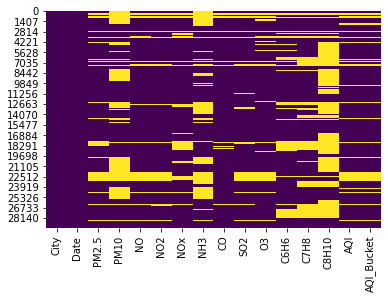

In [345]:
import seaborn as sns
sns.heatmap(df.isnull(),cmap="viridis",cbar=False)

In [346]:
# droping C8H10 as ist has 61% null values
df = df.drop("C8H10",axis=1)

In [347]:
df["AQI_Bucket"] = df["AQI_Bucket"].astype("category")
df_prediction = df[df["AQI_Bucket"].isnull()]
df = df[df["AQI_Bucket"].notnull()]

print(df.head())


         City       Date   PM2.5  PM10     NO    NO2    NOx  NH3     CO  \
28  Ahmedabad 2015-01-29   83.13   NaN   6.93  28.71  33.72  NaN   6.93   
29  Ahmedabad 2015-01-30   79.84   NaN  13.85  28.68  41.08  NaN  13.85   
30  Ahmedabad 2015-01-31   94.52   NaN  24.39  32.66  52.61  NaN  24.39   
31  Ahmedabad 2015-02-01  135.99   NaN  43.48  42.08  84.57  NaN  43.48   
32  Ahmedabad 2015-02-02  178.33   NaN  54.56  35.31  72.80  NaN  54.56   

      SO2      O3  C6H6  C7H8    AQI AQI_Bucket  
28  49.52   59.76  0.02  0.00  209.0       Poor  
29  48.49   97.07  0.04  0.00  328.0  Very Poor  
30  67.39  111.33  0.24  0.01  514.0     Severe  
31  75.23  102.70  0.40  0.04  782.0     Severe  
32  55.04  107.38  0.46  0.06  914.0     Severe  


<AxesSubplot:>

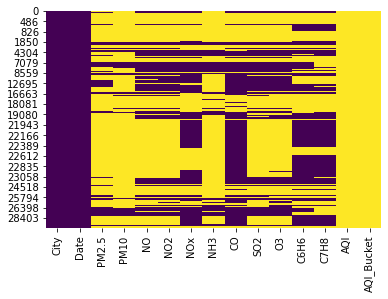

In [348]:
sns.heatmap(df_prediction.isnull(),cmap="viridis",cbar=False)

In [349]:
length_df = len(df)
print(length_df)

24850


<AxesSubplot:>

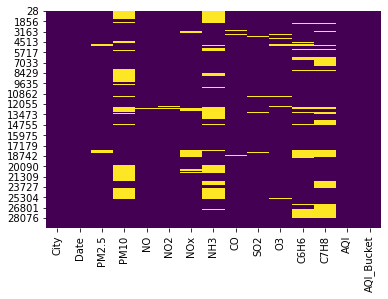

In [350]:
sns.heatmap(df.isnull(),cmap="viridis",cbar=False)

In [351]:
# Extracting year month day from each records
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [352]:
# Filling missing value with 0
col=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'C6H6', 'C7H8']
for c in col:
    df[c].fillna((df[c].mean()),inplace=True)


In [353]:
# feature Engineering
# clubbing all particular matter
df["PM"] = df["PM2.5"] + df["PM10"]
# clubbing nitric oxide
df["Nitric"] = df["NO"]+df["NO2"]+df["NOx"]


In [354]:
# setting index of dataframe to date

df.set_index(df["Date"],drop=True,inplace=True)

In [355]:
# AQI_Bucket yearly analysis
year_aqi_bucket=df.groupby(["Year","AQI_Bucket"])["AQI_Bucket"].count()
year_aqi_bucket= pd.DataFrame(year_aqi_bucket)
year_aqi_bucket.columns = ["AQI_Bucket Count"]
year_aqi_bucket.reset_index(inplace=True)
year_aqi_bucket

,Year,AQI_Bucket,AQI_Bucket Count
0,2015,Good,27
1,2015,Moderate,756
2,2015,Poor,326
3,2015,Satisfactory,278
4,2015,Severe,145
5,2015,Very Poor,295
6,2016,Good,80
7,2016,Moderate,1040
8,2016,Poor,388
9,2016,Satisfactory,494


In [356]:
year_aqi_bucket_pivot = year_aqi_bucket.pivot_table(index="AQI_Bucket",columns="Year",values="AQI_Bucket Count")
year_aqi_bucket_pivot.fillna(0,inplace=True)

<AxesSubplot:xlabel='Year', ylabel='AQI_Bucket'>

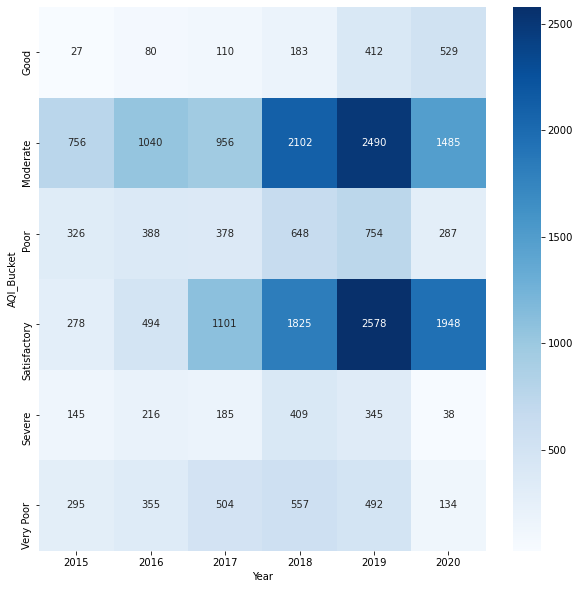

In [357]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(year_aqi_bucket_pivot
            ,cmap="Blues",annot=True,fmt="g")

In [358]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8', 'AQI', 'AQI_Bucket', 'Year', 'Month', 'Day', 'PM',
       'Nitric'],
      dtype='object')

In [359]:
df_temp = df.iloc[:,2:13]
df_temp["PM"] = df["PM"]
df_temp["Nitric"] = df["Nitric"]
df_temp_col=df_temp.columns
df_temp["Year"] = df["Year"]
df_temp["Month"] = df["Month"]


Monthly Analysis of gases for 2015


<ipython-input-360-daee43d616ae>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8','PM','Nitric'].sum()).reset_index()


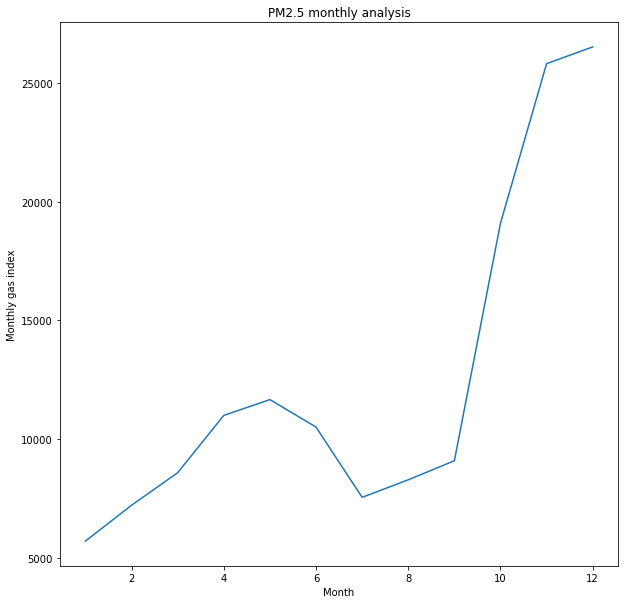

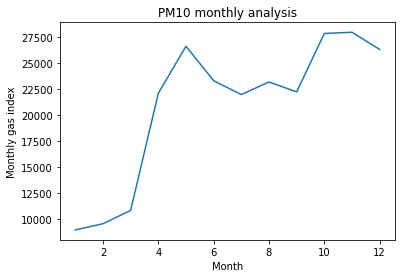

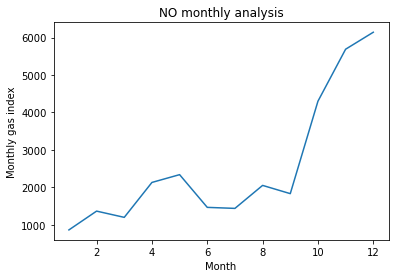

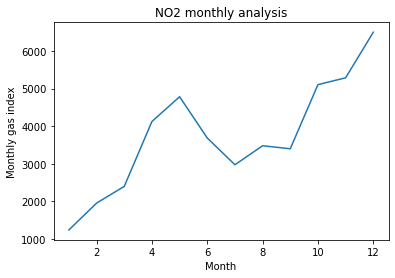

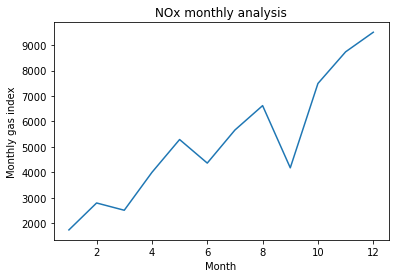

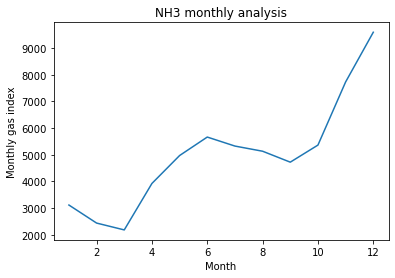

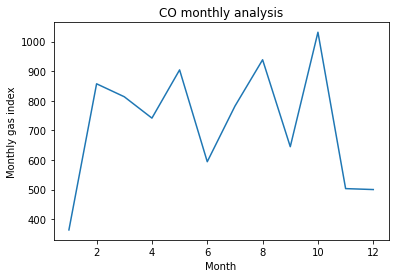

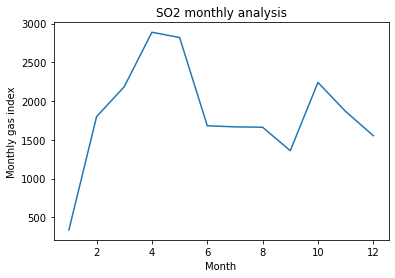

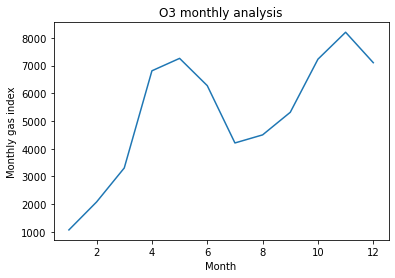

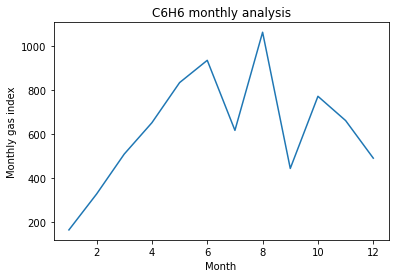

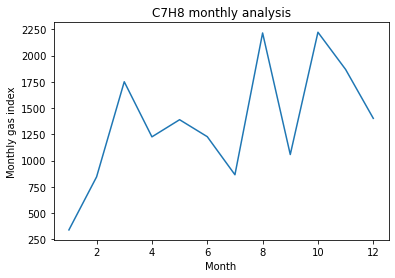

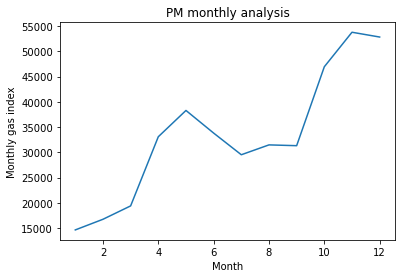

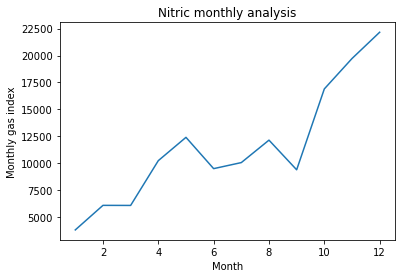

Monthly Analysis of gases for 2016


<ipython-input-360-daee43d616ae>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8','PM','Nitric'].sum()).reset_index()


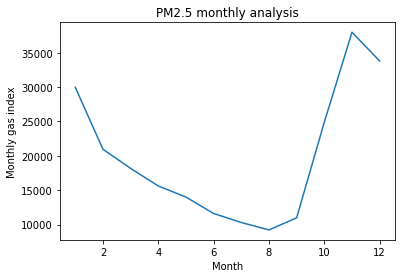

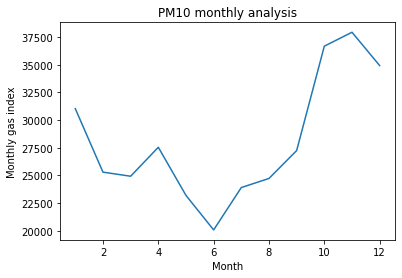

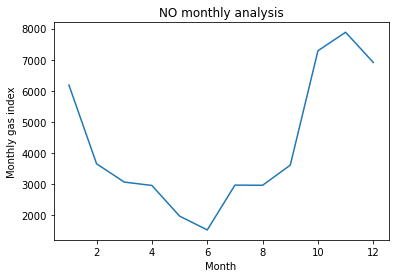

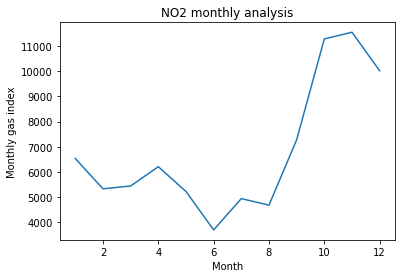

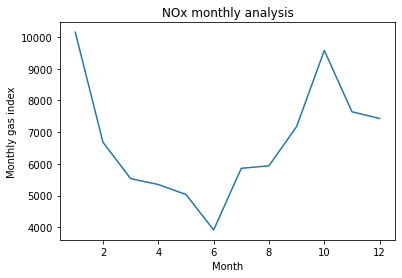

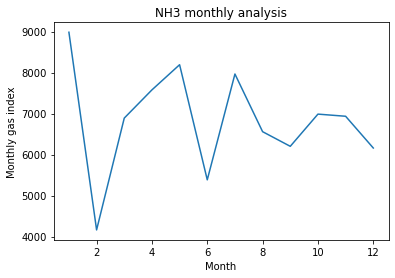

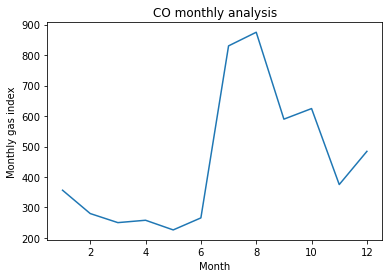

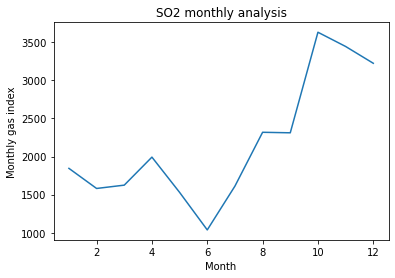

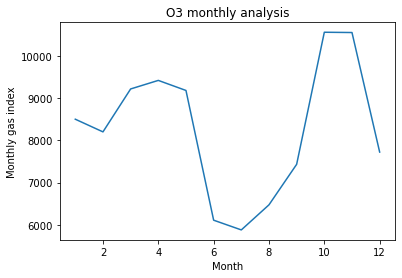

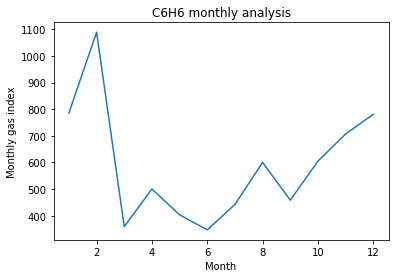

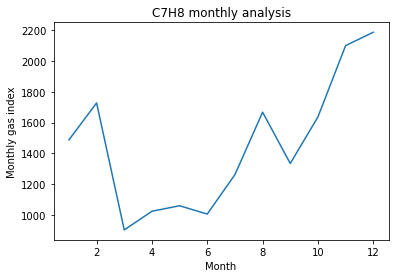

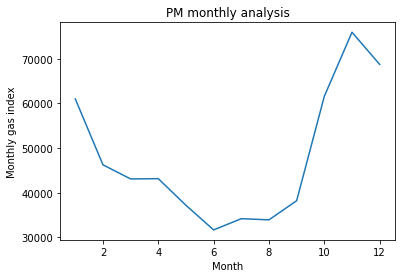

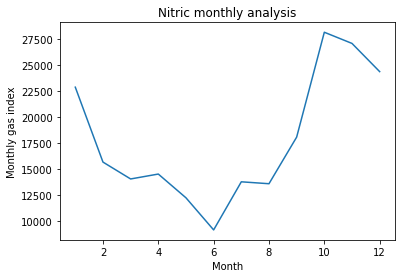

Monthly Analysis of gases for 2017


<ipython-input-360-daee43d616ae>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8','PM','Nitric'].sum()).reset_index()


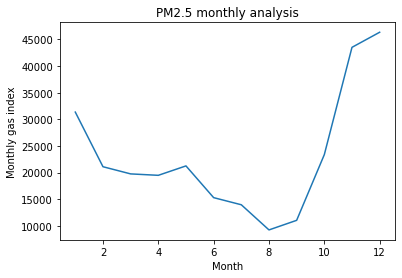

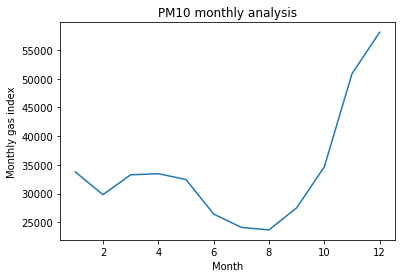

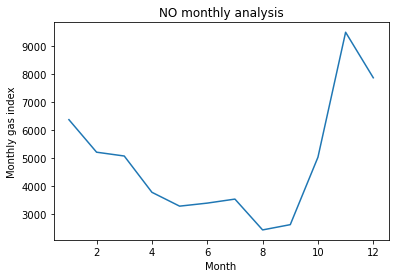

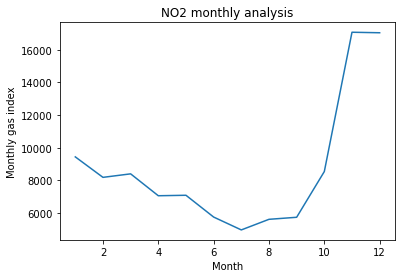

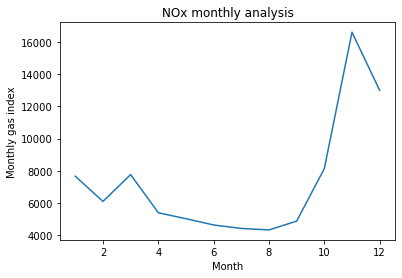

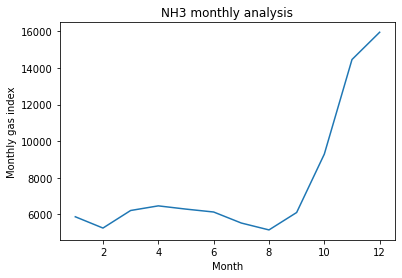

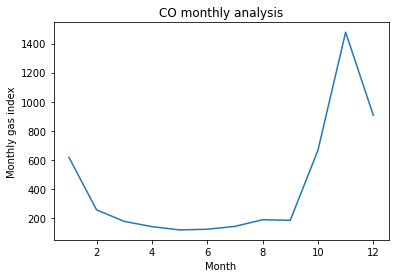

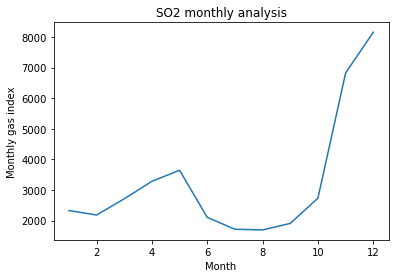

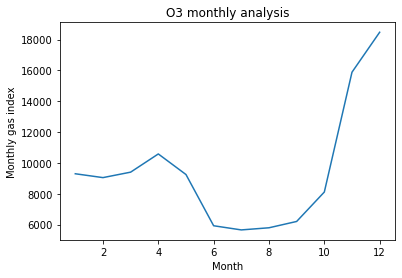

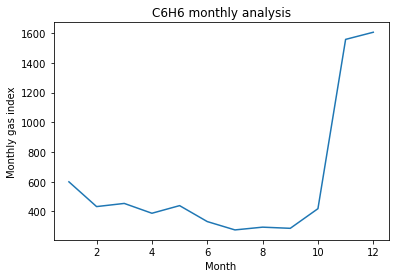

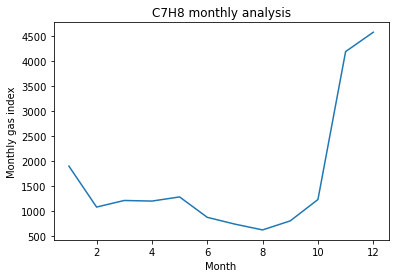

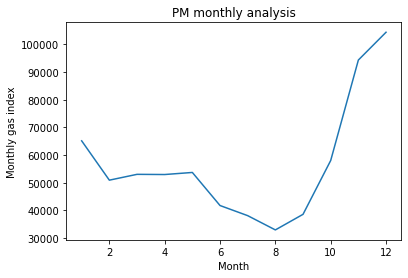

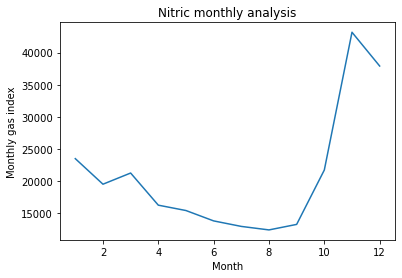

Monthly Analysis of gases for 2018


<ipython-input-360-daee43d616ae>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8','PM','Nitric'].sum()).reset_index()


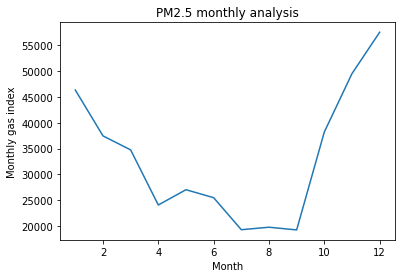

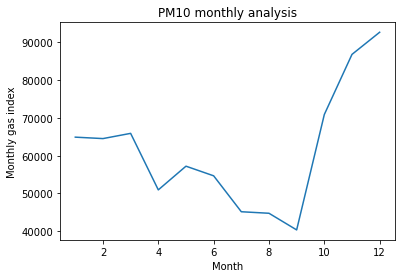

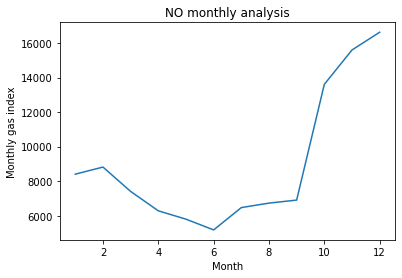

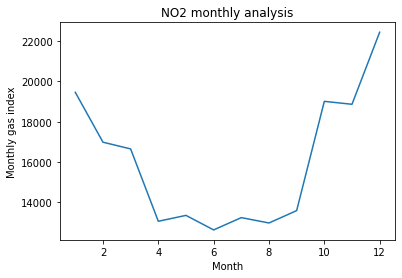

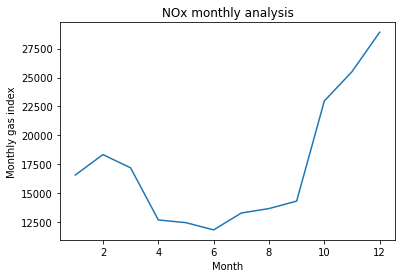

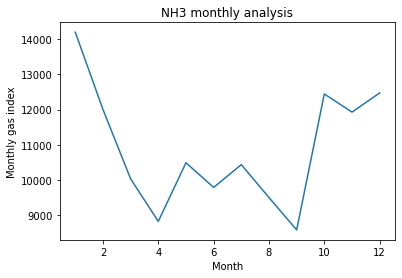

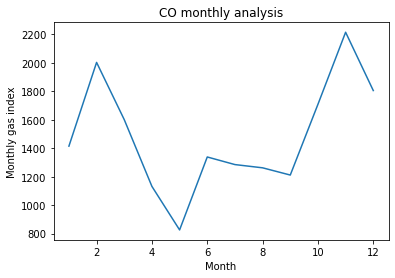

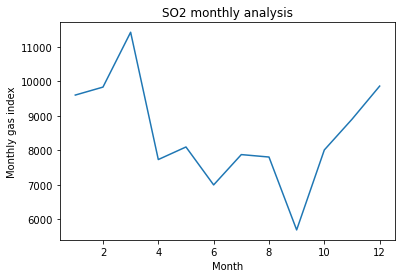

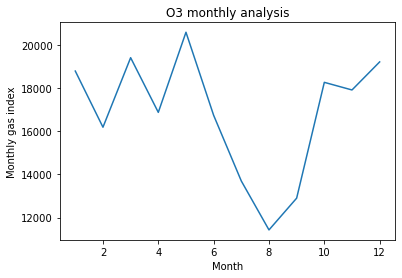

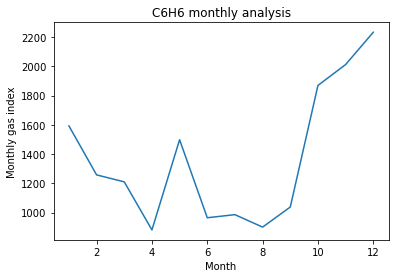

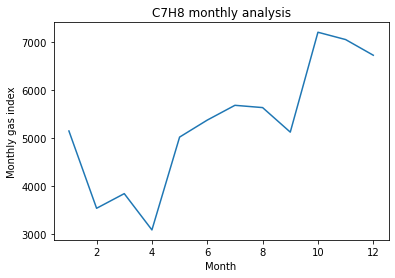

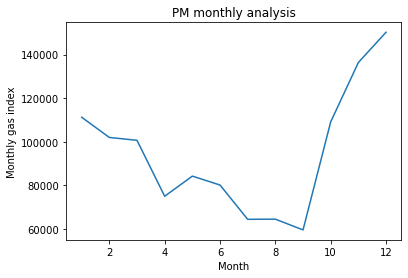

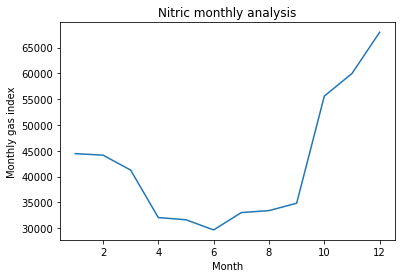

Monthly Analysis of gases for 2019


<ipython-input-360-daee43d616ae>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8','PM','Nitric'].sum()).reset_index()


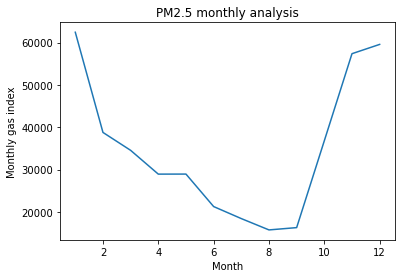

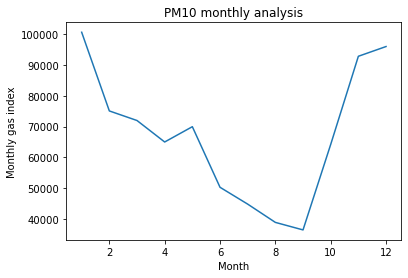

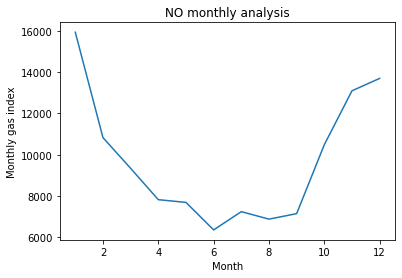

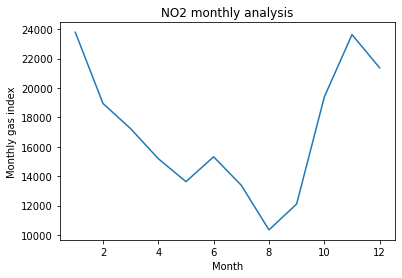

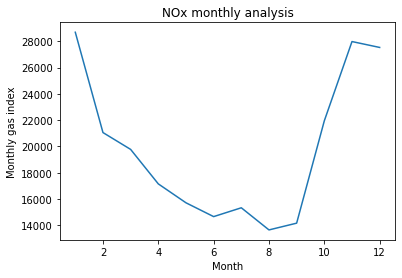

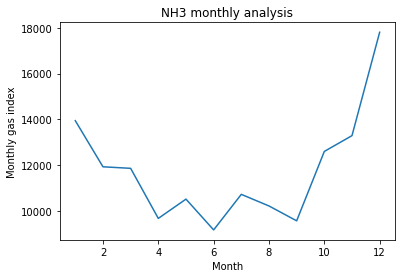

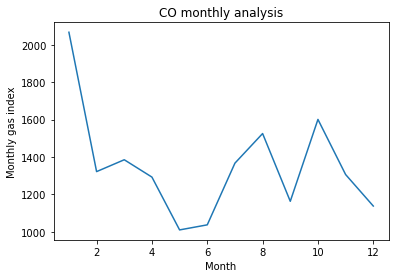

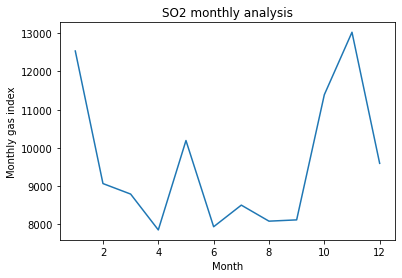

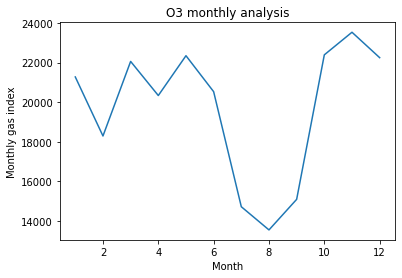

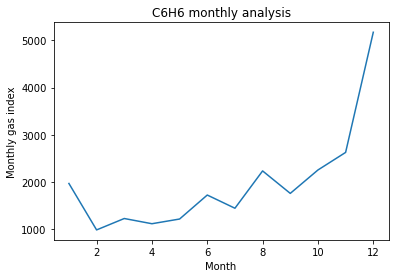

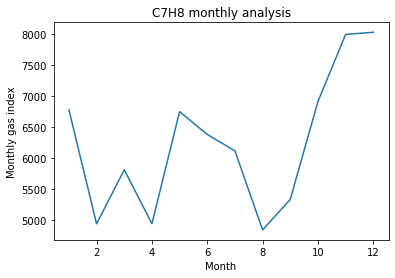

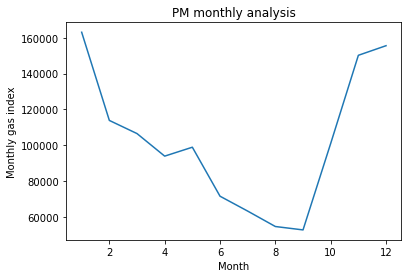

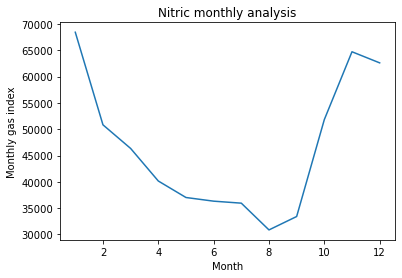

Monthly Analysis of gases for 2020


<ipython-input-360-daee43d616ae>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8','PM','Nitric'].sum()).reset_index()


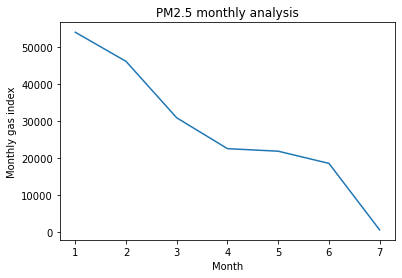

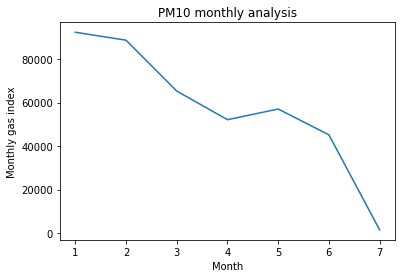

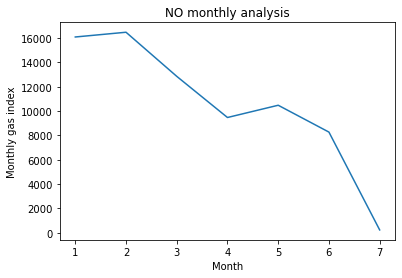

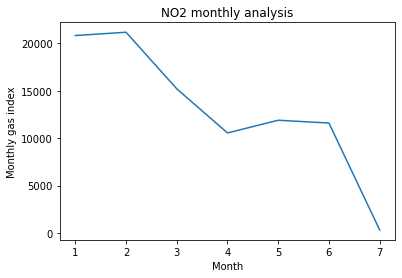

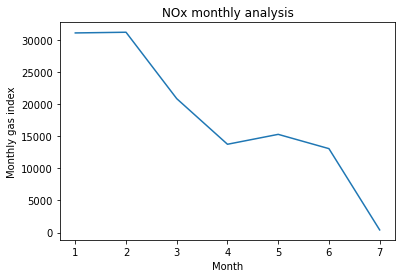

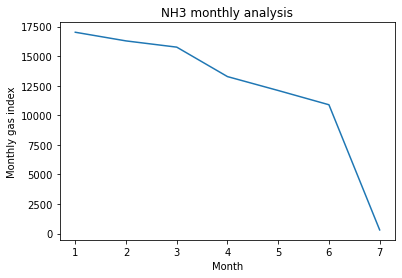

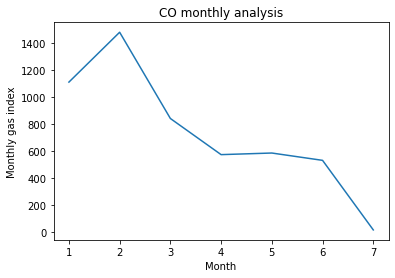

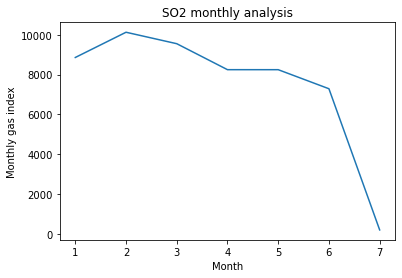

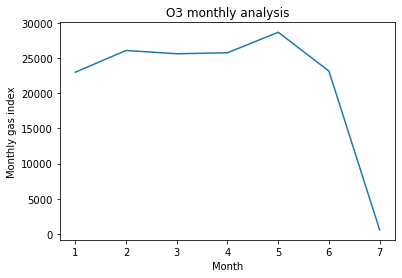

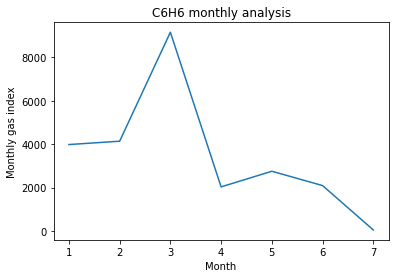

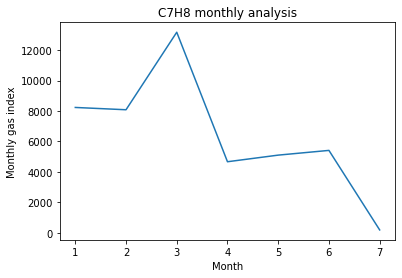

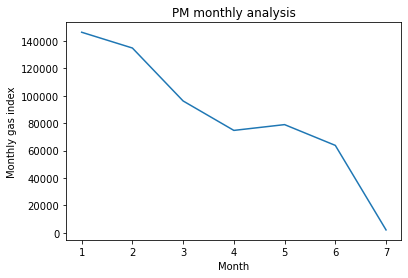

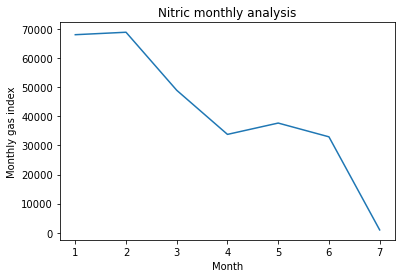

In [360]:
# gases monthly analysis every year
g_m_a= pd.DataFrame(df_temp.groupby(["Year","Month"])[df_temp_col].sum().reset_index())
year = [2015,2016,2017,2018,2019,2020]
fig = plt.figure(figsize=(10,10))
for y in (year):
    print("Monthly Analysis of gases for {}".format(y))
    gma = g_m_a[g_m_a["Year"]==y]
    gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8','PM','Nitric'].sum()).reset_index()
    column = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8','PM','Nitric']
    for col in column:
        plt.title("{} monthly analysis".format(col))
        plt.xlabel("Month")
        
        plt.ylabel("Monthly gas index")
        plt.plot(gma_y["Month"],gma_y[col])
        plt.show()
    

In [361]:
# Data manupulation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["City"])
df["City"] = le.transform(df["City"])

In [362]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket,Year,Month,Day,PM,Nitric
Date,,,,,,,,,,,,,,,,,,,,
2015-01-29,0,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,209.0,Poor,2015,1,29,201.584435,69.36
2015-01-30,0,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor,2015,1,30,198.294435,83.61
2015-01-31,0,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,514.0,Severe,2015,1,31,212.974435,109.66
2015-02-01,0,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,782.0,Severe,2015,2,1,254.444435,170.13
2015-02-02,0,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,914.0,Severe,2015,2,2,296.784435,162.67


In [363]:
from sklearn.model_selection import train_test_split
df_features = df[["City","Day","Month","Year","PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","C6H6","C7H8","PM","Nitric"]]
df_labels = df["AQI"]
X_train,X_test,Y_train,Y_test = train_test_split(df_features,df_labels,test_size=0.2,random_state=21)

In [364]:
# removing Localoutliers
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1


In [365]:
X_train,Y_train = X_train[mask], Y_train[mask]

City      0
Day       0
Month     0
Year      0
PM2.5     0
PM10      0
NO        0
NO2       0
NOx       0
NH3       0
CO        0
SO2       0
O3        0
C6H6      0
C7H8      0
PM        0
Nitric    0
dtype: int64